In [212]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv('formated_data_new.csv')
df.head(5)

,Game ID,Genres,Developers,Publishers,Release date,Current price in €,Number of reviews,Positive rate in reviews in %,SteamDB score in %,Minimum requirements,Min configuration class
0,568070,"['Action', 'Adventure', 'Indie']",['Triplevision Games'],['Graffiti Games'],2019-08-23,3.12,58,60.0,57.31,"{'Processor': ' 2ghz dual core cpu', 'Memory':...",1
1,568090,"['Action', 'Indie']",['Waygetter Electronics'],"['Little Flag Software, LLC']",2016-12-28,2.39,2027,91.0,87.13,"{'Processor': ' 2.0 ghz dual core processor', ...",1
2,568130,"['Action', 'Adventure', 'Indie']",['Nickana Studio'],['Nickana Studio'],2017-01-03,3.99,20,65.0,59.00,"{'Processor': ' 1.4ghz or faster', 'Memory': '...",0
3,568180,"['Action', 'Adventure', 'Indie']",['Sword Twin Studios Ltd.'],['Sword Twin Studios Ltd.'],2017-03-31,0.00,12,92.0,72.42,"{'Processor': ' 2.5 ghz dual core', 'Memory': ...",1
4,568200,"['Casual', 'Indie']",['Bruno Freitas'],['Bruno Freitas'],2016-12-19,1.99,28,93.0,77.30,"{'Processor': ' intel/amd dual core 1,2ghz', '...",1


## Analysis of the distribution of the Positive rate in reviews according to class

In [160]:
for i in range(0,4):
    print("Stats of of Min configuration of class ", i)
    print(df[df['Min configuration class']==i]['Positive rate in reviews in %'].describe(), "\n")

Stats of of Min configuration of class  0
count    9869.00000
mean       71.14125
std        20.12185
min         0.00000
25%        59.00000
50%        75.00000
75%        88.00000
max       100.00000
Name: Positive rate in reviews in %, dtype: float64 

Stats of of Min configuration of class  1
count    3580.000000
mean       69.793017
std        19.991418
min         0.000000
25%        56.000000
50%        74.000000
75%        86.000000
max       100.000000
Name: Positive rate in reviews in %, dtype: float64 

Stats of of Min configuration of class  2
count    2331.000000
mean       69.891892
std        19.306348
min         5.000000
25%        57.000000
50%        74.000000
75%        86.000000
max        99.000000
Name: Positive rate in reviews in %, dtype: float64 

Stats of of Min configuration of class  3
count    1350.000000
mean       66.771111
std        19.886973
min         7.000000
25%        52.250000
50%        70.000000
75%        83.000000
max       100.000000
Name: 

The number of positive reviews seems to decrease more the recommended config are high. The mean seems to gradually decrease.

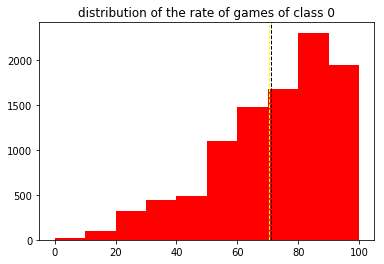

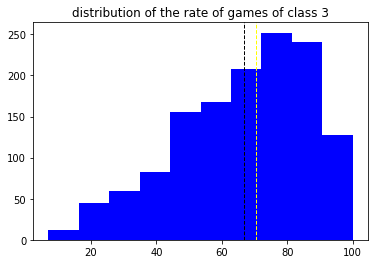

In [153]:
class_0 = df[df['Min configuration class']==0]
class_3 = df[df['Min configuration class']==3]

plt.figure(221)
plt.hist(class_0['Positive rate in reviews in %'], color="red")
plt.title("distribution of the rate of games of class 0")
plt.axvline(class_0['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Positive rate in reviews in %'].mean(), color='yellow', linestyle='dashed', linewidth=1)

plt.figure(222)
plt.hist(class_3['Positive rate in reviews in %'], color="blue")
plt.title("distribution of the rate of games of class 3")
plt.axvline(class_3['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Positive rate in reviews in %'].mean(), color='yellow', linestyle='dashed', linewidth=1)

plt.show()

The mean of the grades of class 3 is a bit lower than those of class 0. We can see that this is because the distribution is bit different. For class 3, not many games have a very high grade (above 90). Furthermore, the grade are uch more distributed with many more games having a low grade (below 50) 

In [162]:
low_grades = df[df['Positive rate in reviews in %']<50]
very_high_grades = df[df['Positive rate in reviews in %']>90]

print("overall proportion of low grades: ",  100*len(low_grades)/len(df))
print("class 0 proportion of low grades: ", 100*len(low_grades[low_grades['Min configuration class']==0])/len(class_0))
print("class 3 proportion of low grades: ", 100*len(low_grades[low_grades['Min configuration class']==3])/len(class_3), "\n")

print("overall proportion of very high grades: ",  100*len(very_high_grades)/len(df))
print("class 0 proportion of very high grades: ", 100*len(very_high_grades[very_high_grades['Min configuration class']==0])/len(class_0))
print("class 3 proportion of very high grades: ", 100*len(very_high_grades[very_high_grades['Min configuration class']==3])/len(class_3))


overall proportion of low grades:  14.530064214827787
class 0 proportion of low grades:  13.973046914581012
class 3 proportion of low grades:  17.40740740740741 

overall proportion of very high grades:  15.726795096322242
class 0 proportion of very high grades:  17.26618705035971
class 3 proportion of very high grades:  9.481481481481481


Class 3 has a higher propotion of low graded games and a much lower proportion of games with very high grades. Class 0 games have a  higher proportion of games with very high grades than the average

## Analysis of the distribution of the Positive rate in reviews according to class

In [16]:
for i in range(0,4):
    print("Number of reviews for class", i)
    print(df[df['Min configuration class']==i]['Number of reviews'].describe(), "\n")

Number of reviews for class 0
count     9876.000000
mean       227.531288
std       1224.738671
min          1.000000
25%         10.000000
50%         27.000000
75%         89.000000
max      48827.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 1
count     3582.000000
mean       428.106644
std       2503.793843
min          0.000000
25%         11.000000
50%         33.000000
75%        126.000000
max      78179.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 2
count     2334.000000
mean       494.788346
std       3393.197616
min          2.000000
25%         10.000000
50%         25.000000
75%         95.750000
max      85491.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 3
count     1350.000000
mean       627.913333
std       4249.289974
min          2.000000
25%          9.000000
50%         23.000000
75%         76.000000
max      80911.000000
Name: Number of reviews, dtype: float64 



The mean of the number of reviews per game for class 3 is much higher. The game are more sophisticated and are for a more dedicated community. Thus, the gamers are more likely to leave reviews. Whereas, the mean of the number of reviews per game for class 0 is much lower than average. As the games are likely to be less time-consuming and probably less work was given to it, many games don't have many reviews.

In [19]:
df[df['Number of reviews']>1000].groupby('Min configuration class')['Game ID'].count()

Min configuration class
0    400
1    228
2    155
3     88
Name: Game ID, dtype: int64

Even if the mean of the number of review, the vast majority of games have below 100 reviews. The mean of class 3 is much higer but the majority of games with a lot of reviews (above 1000) are of class 0.

Very low correlation (after modification of table, look at coorelation matric with price and date release)

Text(0,0.5,'Positive rate in reviews')

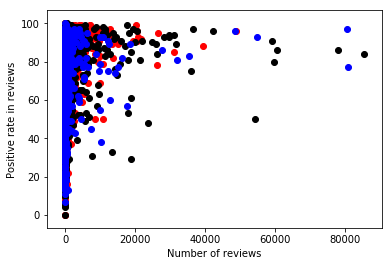

In [24]:
plt.scatter(df[df["Min configuration class"]==0]['Number of reviews'], df[df["Min configuration class"]==0]['Positive rate in reviews in %'], color = "red")
plt.scatter(df[df["Min configuration class"]==1]['Number of reviews'], df[df["Min configuration class"]==1]['Positive rate in reviews in %'], color = "black")
plt.scatter(df[df["Min configuration class"]==2]['Number of reviews'], df[df["Min configuration class"]==2]['Positive rate in reviews in %'], color = "black")
plt.scatter(df[df["Min configuration class"]==3]['Number of reviews'], df[df["Min configuration class"]==3]['Positive rate in reviews in %'], color = "blue")

plt.xlabel("Number of reviews")
plt.ylabel("Positive rate in reviews")

## Analysis of the genres

In [26]:
Action = df[df['Genres'].str.contains("Action") == True]
Adventure = df[df['Genres'].str.contains("Adventure") == True]
RPG = df[df['Genres'].str.contains("RPG") == True]
Strategy = df[df['Genres'].str.contains("Strategy") == True]
Simulation = df[df['Genres'].str.contains("Simulation") == True]
Casual = df[df['Genres'].str.contains("Casual") == True]
Indie = df[df['Genres'].str.contains("Indie") == True]
Sports = df[df['Genres'].str.contains("Sports") == True]

print(df['Positive rate in reviews in %'].describe(), "\n")
print(Action['Positive rate in reviews in %'].describe(), "\n")
print(Adventure['Positive rate in reviews in %'].describe(), "\n")
print(RPG['Positive rate in reviews in %'].describe(), "\n")
print(Strategy['Positive rate in reviews in %'].describe(), "\n")
print(Simulation['Positive rate in reviews in %'].describe(), "\n")
print(Casual['Positive rate in reviews in %'].describe(), "\n")
print(Indie['Positive rate in reviews in %'].describe(), "\n")
print(Sports['Positive rate in reviews in %'].describe(), "\n")

count    17142.000000
mean        70.338700
std         20.001688
min          0.000000
25%         57.000000
50%         75.000000
75%         87.000000
max        100.000000
Name: Positive rate in reviews in %, dtype: float64 

count    6925.000000
mean       69.262671
std        20.084625
min         6.000000
25%        56.000000
50%        73.000000
75%        86.000000
max        99.000000
Name: Positive rate in reviews in %, dtype: float64 

count    6735.000000
mean       70.726503
std        20.158594
min         0.000000
25%        58.000000
50%        75.000000
75%        87.000000
max       100.000000
Name: Positive rate in reviews in %, dtype: float64 

count    2986.000000
mean       71.119558
std        19.143331
min         7.000000
25%        60.000000
50%        75.000000
75%        86.000000
max       100.000000
Name: Positive rate in reviews in %, dtype: float64 

count    3171.000000
mean       68.845790
std        19.246906
min         0.000000
25%        57.000000

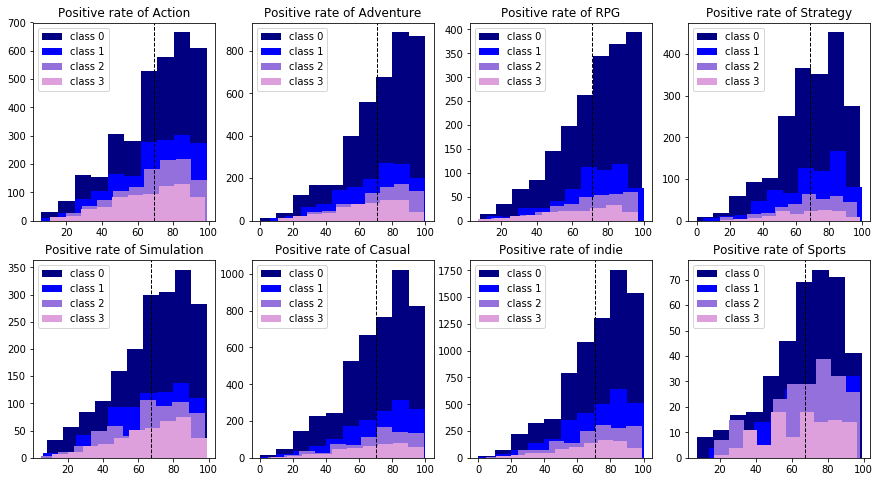

In [27]:
plt.figure(figsize=(15,8))

plt.subplot(241)
plt.hist(Action[Action['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Action[Action['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Action[Action['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Action[Action['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Action")
plt.axvline(Action['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(242)
plt.hist(Adventure[Adventure['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Adventure[Adventure['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Adventure[Adventure['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Adventure[Adventure['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Adventure")
plt.axvline(Adventure['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(243)
plt.hist(RPG[RPG['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(RPG[RPG['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(RPG[RPG['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(RPG[RPG['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of RPG")
plt.axvline(RPG['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(244)
plt.hist(Strategy[Strategy['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Strategy[Strategy['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Strategy[Strategy['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Strategy[Strategy['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Strategy")
plt.axvline(Strategy['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(245)
plt.hist(Simulation[Simulation['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Simulation[Simulation['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Simulation[Simulation['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Simulation[Simulation['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Simulation")
plt.axvline(Simulation['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(246)
plt.hist(Casual[Casual['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Casual[Casual['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Casual[Casual['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Casual[Casual['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Casual")
plt.axvline(Casual['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(247)
plt.hist(Indie[Indie['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Indie[Indie['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Indie[Indie['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Indie[Indie['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of indie")
plt.axvline(Indie['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(248)
plt.hist(Sports[Sports['Min configuration class']==0]['Positive rate in reviews in %'], color="navy", label = 'class 0')
plt.hist(Sports[Sports['Min configuration class']==1]['Positive rate in reviews in %'], color="blue", label = 'class 1')
plt.hist(Sports[Sports['Min configuration class']==2]['Positive rate in reviews in %'], color="mediumpurple", label = 'class 2')
plt.hist(Sports[Sports['Min configuration class']==3]['Positive rate in reviews in %'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Sports")
plt.axvline(Sports['Positive rate in reviews in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

There doesn't seem to be any correlation betwen the genre of the game and the rate given by the users. However, these chats show that there isn't the same distribution of classes for each genres. For instance, it seem that Strategy and Casual games don't need to have important material as the porportion of class 2/3 is very low. However, Sports , Simulation and Action games, whose graphics are much more evolved and rapid apparently need more high tech material.

In [155]:
print("proportion of class 3 : ", 100*len(df[df['Min configuration class']==3])/len(df))
print("proportion of class 3 for simulation game: ", 100*len(Simulation[Simulation['Min configuration class']==3])/len(Simulation))

proportion of class 3 :  7.880910683012259
proportion of class 3 for simulation game:  10.771793448084397


## Price Analysis

In [156]:
for i in range(0,4):
    print("Price for class", i)
    print(df[df['Min configuration class']==i]['Current price in €'].describe(), "\n")

Price for class 0
count    9869.000000
mean        3.302861
std         5.077279
min         0.000000
25%         0.390000
50%         1.590000
75%         4.090000
max        79.990000
Name: Current price in €, dtype: float64 

Price for class 1
count    3580.000000
mean        3.967712
std         5.417281
min         0.000000
25%         0.550000
50%         1.990000
75%         4.990000
max        59.990000
Name: Current price in €, dtype: float64 

Price for class 2
count    2331.000000
mean        5.433398
std         6.741659
min         0.000000
25%         0.590000
50%         3.490000
75%         8.190000
max        59.990000
Name: Current price in €, dtype: float64 

Price for class 3
count    1350.000000
mean        6.160407
std         7.183868
min         0.000000
25%         0.475000
50%         3.990000
75%         9.790000
max        69.990000
Name: Current price in €, dtype: float64 



proportion of free games in class 0 : 15.360469825840422
proportion of free games in class 1 : 13.428252372975992
proportion of free games in class 2 : 19.794344473007712
proportion of free games in class 3 : 22.666666666666668


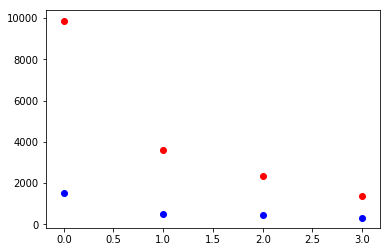

In [98]:
class_0_f = df.loc[(df['Min configuration class']==0) & (df['Current price in €']==0)]
class_1_f = df.loc[(df['Min configuration class']==1) & (df['Current price in €']==0)]
class_2_f = df.loc[(df['Min configuration class']==2) & (df['Current price in €']==0)]
class_3_f = df.loc[(df['Min configuration class']==3) & (df['Current price in €']==0)]

plt.scatter([0,1,2,3],[len(class_0_f), len(class_1_f), len(class_2_f), len(class_3_f)] , color="blue")
plt.scatter([0,1,2,3],[len(class_0), len(class_1), len(class_2), len(class_3)] , color="red")
print("proportion of free games in class 0 :", 100*len(class_0_f)/len(class_0))
print("proportion of free games in class 1 :", 100*len(class_1_f)/len(class_1))
print("proportion of free games in class 2 :", 100*len(class_2_f)/len(class_2))
print("proportion of free games in class 3 :", 100*len(class_3_f)/len(class_3))

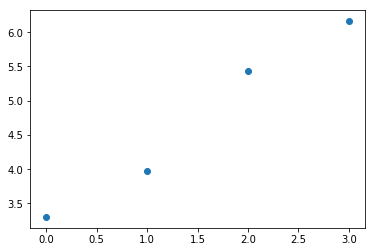

In [99]:
mean_p = [np.mean(df[df['Min configuration class']==i]['Current price in €']) for i in range(0,4)]
plt.scatter([0,1,2,3], mean_p)

We can clearly see that the price and the class that we have created are correlated. The games of class 3 are in averga much pricier than the games of class 0. However, even if the mean of price of class 3 is superior

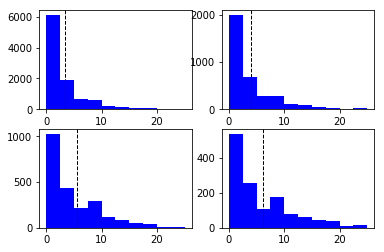

In [59]:
class_0 = df[df['Min configuration class']==0]
class_1 = df[df['Min configuration class']==1]
class_2 = df[df['Min configuration class']==2]
class_3 = df[df['Min configuration class']==3]

plt.subplot(221)
plt.hist(class_0[class_0['Current price in €']<25]['Current price in €'], color="blue")
plt.axvline(class_0['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(222)
plt.hist(class_1[class_1['Current price in €']<25]['Current price in €'], color="blue")
plt.axvline(class_1['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(223)
plt.hist(class_2[class_2['Current price in €']<25]['Current price in €'], color="blue")
plt.axvline(class_2['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(224)
plt.hist(class_3[class_3['Current price in €']<25]['Current price in €'], color="blue")
plt.axvline(class_3['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.show()

In [232]:
"""corrMatrix = df[["Min configuration class", "Positive rate in reviews in %", "Number of reviews", "Current price in €", "SteamDB score in %"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()"""

for p in np.arange(0,80000,300):
    res = 0
    prix = 0
    zozo = df.loc[(df["Number of reviews"]>p)]
    c = np.corrcoef([0,1,2,3], [np.mean(zozo[zozo['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)])
    print(c[0][1])
    if c[0][1] < res :
        res = c[0][1]
        prix = p


print(res)
print(prix)

-0.899691485675977
-0.9388685977743151
-0.9818610484490187
-0.9769219056027598
-0.9767349672809781
-0.9817156590258227
-0.9874311619243489
-0.996363645195152
-0.9911472846085762
-0.991901315769374
-0.9828903993623466
-0.9875134355340206
-0.9960609382187166
-0.996669455590337
-0.9925663110852775
-0.9926002783667737
-0.9819236218440304
-0.9844158049895086
-0.9714346987462138
-0.9419642082668902
-0.9723661398812992
-0.9764695339359865
-0.9808611538528409
-0.9754916777899942
-0.943675567978214
-0.940149340624103
-0.814107458178041
-0.826852453557484
-0.8048662041877442
-0.8264400640697352
-0.8463842189827883
-0.8908927371323743
-0.8849879070788872
-0.883095763995705
-0.883349118393361
-0.8148937252272044
-0.8103249026190308
-0.7725847276834711
-0.7142364889278141
-0.6898103287026255
-0.6582422062034786
-0.6762246857829995
-0.6482536749286547
-0.5546856960582411
-0.5369096091179762
-0.7238827957731852
-0.7390366645003529
-0.7117165634551508
-0.6498952376656493
-0.6557606482802664
-0.6483197

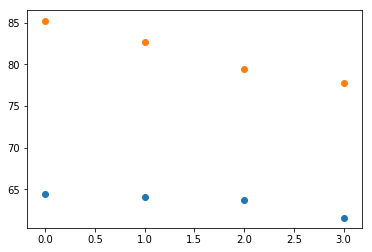

In [238]:
x = [0,1,2,3]
y = mean_p = [np.mean(df[df['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)]
plt.scatter(x,y)

x = [0,1,2,3]
zozo = df.loc[df["Number of reviews"]>2500]
y1 = mean_p = [np.mean(zozo[zozo['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)]
plt.scatter(x,y1)

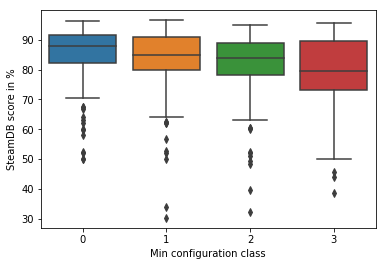

In [236]:
ax = sn.boxplot(x="Min configuration class", y="SteamDB score in %", data=df[df["Number of reviews"]>2500])
